<a href="https://colab.research.google.com/github/vineetvermaml/NLP-Text-Preprocessing-techniques/blob/main/textprocessing_nltk_spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
!pip install Unidecode

     |████████████████████████████████| 235 kB 4.3 MB/s 


In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 4.0 MB/s 
     |████████████████████████████████| 284 kB 32.4 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85435 sha256=d0bdce34aef0dc8403a6651e78655d9de86955386562d1afbd3e92df4015c4e1
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 3.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
# import re

# strs = "how much for the maple syrup? $20.99? That's ricidulous!!!"
# print(strs)
# nstr = re.sub(r'[?|$|.|!]',r'',strs)
# print(nstr)
# nestr = re.sub(r'[^a-zA-Z0-9 ]',r'',nstr)
# print(nestr)

how much for the maple syrup? $20.99? That's ricidulous!!!
how much for the maple syrup 2099 That's ricidulous
how much for the maple syrup 2099 Thats ricidulous


In [ ]:
import sys  
!{sys.executable} -m pip install contractions

In [ ]:
import numpy as np
import pandas as pd
import spacy
from bs4 import BeautifulSoup
import sys 

In [ ]:
#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
import unidecode
# from word2number import w2n
import contractions

In [ ]:
import re

In [ ]:
from unidecode import unidecode

In [ ]:
# https://iq.opengenus.org/text-preprocessing-in-spacy/


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Imdbdataset/IMDB Dataset.csv', encoding='UTF-8')

In [ ]:
df1.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df1.shape

(50000, 2)

## Extracting 25000 records only , above DataFrame consist of 50,000 records

In [ ]:
df1 = df1.iloc[:1000]

In [ ]:
df1.shape

(1000, 2)

### Text Preprocessing

In [ ]:
# Dont forget to restart run time after downloading the above 

In [ ]:
df1['review']

0      One of the other reviewers has mentioned that ...
1      A wonderful little production. <br /><br />The...
2      I thought this was a wonderful way to spend ti...
3      Basically there's a family where a little boy ...
4      Petter Mattei's "Love in the Time of Money" is...
                             ...                        
995    Nothing is sacred. Just ask Ernie Fosselius. T...
996    I hated it. I hate self-aware pretentious inan...
997    I usually try to be professional and construct...
998    If you like me is going to see this in a film ...
999    This is like a zoology textbook, given that it...
Name: review, Length: 1000, dtype: object

#### Converting all review into a single paragraph


In [ ]:
# #https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79

In [ ]:
#https://gist.github.com/jiahao87/d57a2535c2ed7315390920ea9296d79f

In [ ]:
df1['review'] = df1['review'].astype(str)

In [ ]:
# para = df1['review'].str.cat(sep=' ')

In [ ]:
# def convert_para(text):
#     para_text = ''.join(text)
#     return para_text

In [ ]:
# df1['review'].apply(lambda text: convert_para(text))

In [ ]:
# type(para)

### Converting the paragraph into lower case

In [ ]:
def lower_case(text):
  return text.lower()


### Removing the html tags from the text

In [ ]:
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

### Removing extra spaces spaces 

In [ ]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

### Removing accented Char

In [ ]:
def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode(text)
    return text

### Expand Contractions

In [ ]:
def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text

### Removing Special Characters

In [ ]:
def removing_spec(text):
  #formatted_text = re.sub(r"[^a-zA-Z0-9:$-,%.?!]+", ' ', text)
  formatted_text = re.sub(r'[^a-zA-Z0-9 ]',r'',text)
  return formatted_text

### Removing STOP WORDS using Spacy

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
def remove_stopwords(text):
  my_doc = nlp(text)
  token_list = []
  for token in my_doc:
    token_list.append(token.text)
  filtered_sentence =[]
  for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
      filtered_sentence.append(word)
  listToStr = ' '.join([str(elem) for elem in filtered_sentence])
  return listToStr

In [ ]:
#https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews

In [ ]:
df1['review'].head(10)

0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
6    I sure would like to see a resurrection of a u...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
9    If you like original gut wrenching laughter yo...
Name: review, dtype: object

In [ ]:
df1['review']=df1['review'].apply(lower_case)

In [ ]:
df1['review']=df1['review'].apply(strip_html_tags)
#para = strip_html_tags(para)

In [ ]:
df1['review']=df1['review'].apply(remove_whitespace)
#para = remove_whitespace(para)

In [ ]:
df1['review']=df1['review'].apply(remove_accented_chars)
#para = remove_accented_chars(para)

In [ ]:
df1['review']=df1['review'].apply(expand_contractions)
#para = expand_contractions(para)

In [ ]:
df1['review']=df1['review'].apply(removing_spec)
#para = removing_spec(para)

In [ ]:
df1['review'].head(10)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh  innovative ide...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

In [ ]:
df2 = df1.copy(deep=True)

In [ ]:
df2['review'].head(10)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production the filming tech...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
5    probably my alltime favorite movie a story of ...
6    i sure would like to see a resurrection of a u...
7    this show was an amazing fresh  innovative ide...
8    encouraged by the positive comments about this...
9    if you like original gut wrenching laughter yo...
Name: review, dtype: object

In [ ]:
df1['review']=df1['review'].apply(remove_stopwords)

In [ ]:
df2['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda them city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows would not dare forget pre

In [ ]:
df1['review'].head(10)

0    reviewers mentioned watching 1 oz episode hook...
1    wonderful little production filming technique ...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter matteis love time money visually stunni...
5    probably alltime favorite movie story selfless...
6    sure like resurrection dated seahunt series te...
7    amazing fresh   innovative idea 70s aired 7 8 ...
8    encouraged positive comments film looking forw...
9    like original gut wrenching laughter like movi...
Name: review, dtype: object

In [ ]:
## we need to remove '(',')'and ',' , '1-9' from the text 

In [ ]:
# https://www.kdnuggets.com/2018/09/machine-learning-text-classification-using-spacy-python.html

### SpaCy’s Lemmatization

In [ ]:
def lemma_word(text):
  my_doc = nlp(text)
  lemma_list = []
  for token in my_doc:
    lemma_list.append(token.lemma_)

  listTolemma = ' '.join([str(elem) for elem in lemma_list])
  return listTolemma

In [ ]:
df1['review']=df1['review'].apply(lemma_word)

In [ ]:
df1['review']

0      reviewer mention watch 1 oz episode hook right...
1      wonderful little production filming technique ...
2      think wonderful way spend time hot summer week...
3      basically family little boy jake think zombie ...
4      petter matteis love time money visually stunni...
                             ...                        
995    sacred ask ernie fosselius day everybody video...
996    hated hate selfaware pretentious inanity masqu...
997    usually try professional constructive criticiz...
998    like go film history class like school try con...
999    like zoology textbook give depiction animal ac...
Name: review, Length: 1000, dtype: object

### N Grams 

In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams

In [ ]:
df3 = df1.copy(deep=True)

## BI-GRAM

In [ ]:
def ngramconvert(df3,n=2):
    #for item in df:
    df3['BiGram']=df3['review'].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df3

In [ ]:
new_df = ngramconvert(df3,2)


review  ...                                             BiGram
0  reviewer mention watch 1 oz episode hook right...  ...  [(reviewer, mention), (mention, watch), (watch...
1  wonderful little production filming technique ...  ...  [(wonderful, little), (little, production), (p...
2  think wonderful way spend time hot summer week...  ...  [(think, wonderful), (wonderful, way), (way, s...
3  basically family little boy jake think zombie ...  ...  [(basically, family), (family, little), (littl...
4  petter matteis love time money visually stunni...  ...  [(petter, matteis), (matteis, love), (love, ti...

[5 rows x 5 columns]

In [ ]:
new_df['BiGram'][0]

[('reviewer', 'mention'),
 ('mention', 'watch'),
 ('watch', '1'),
 ('1', 'oz'),
 ('oz', 'episode'),
 ('episode', 'hook'),
 ('hook', 'right'),
 ('right', 'exactly'),
 ('exactly', 'happen'),
 ('happen', 'thing'),
 ('thing', 'strike'),
 ('strike', 'oz'),
 ('oz', 'brutality'),
 ('brutality', 'unflinching'),
 ('unflinching', 'scene'),
 ('scene', 'violence'),
 ('violence', 'set'),
 ('set', 'right'),
 ('right', 'word'),
 ('word', 'trust'),
 ('trust', 'faint'),
 ('faint', 'hearte'),
 ('hearte', 'timid'),
 ('timid', 'pull'),
 ('pull', 'punch'),
 ('punch', 'regard'),
 ('regard', 'drug'),
 ('drug', 'sex'),
 ('sex', 'violence'),
 ('violence', 'hardcore'),
 ('hardcore', 'classic'),
 ('classic', 'use'),
 ('use', 'word'),
 ('word', 'call'),
 ('call', 'oz'),
 ('oz', 'nickname'),
 ('nickname', 'give'),
 ('give', 'oswald'),
 ('oswald', 'maximum'),
 ('maximum', 'security'),
 ('security', 'state'),
 ('state', 'penitentary'),
 ('penitentary', 'focus'),
 ('focus', 'mainly'),
 ('mainly', 'emerald'),
 ('emera

### TRI-GRAM

In [ ]:
from nltk.util import ngrams
def ngramconvert(df3,n=3):
    #for item in df:
    df3['TriGram']=df3['review'].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df3

In [ ]:
new_df = ngramconvert(df3,3)
new_df.head()

review  ...                                            TriGram
0  reviewer mention watch 1 oz episode hook right...  ...  [(reviewer, mention, watch), (mention, watch, ...
1  wonderful little production filming technique ...  ...  [(wonderful, little, production), (little, pro...
2  think wonderful way spend time hot summer week...  ...  [(think, wonderful, way), (wonderful, way, spe...
3  basically family little boy jake think zombie ...  ...  [(basically, family, little), (family, little,...
4  petter matteis love time money visually stunni...  ...  [(petter, matteis, love), (matteis, love, time...

[5 rows x 4 columns]

In [ ]:
new_df['TriGram'][0]

[('reviewer', 'mention', 'watch'),
 ('mention', 'watch', '1'),
 ('watch', '1', 'oz'),
 ('1', 'oz', 'episode'),
 ('oz', 'episode', 'hook'),
 ('episode', 'hook', 'right'),
 ('hook', 'right', 'exactly'),
 ('right', 'exactly', 'happen'),
 ('exactly', 'happen', 'thing'),
 ('happen', 'thing', 'strike'),
 ('thing', 'strike', 'oz'),
 ('strike', 'oz', 'brutality'),
 ('oz', 'brutality', 'unflinching'),
 ('brutality', 'unflinching', 'scene'),
 ('unflinching', 'scene', 'violence'),
 ('scene', 'violence', 'set'),
 ('violence', 'set', 'right'),
 ('set', 'right', 'word'),
 ('right', 'word', 'trust'),
 ('word', 'trust', 'faint'),
 ('trust', 'faint', 'hearte'),
 ('faint', 'hearte', 'timid'),
 ('hearte', 'timid', 'pull'),
 ('timid', 'pull', 'punch'),
 ('pull', 'punch', 'regard'),
 ('punch', 'regard', 'drug'),
 ('regard', 'drug', 'sex'),
 ('drug', 'sex', 'violence'),
 ('sex', 'violence', 'hardcore'),
 ('violence', 'hardcore', 'classic'),
 ('hardcore', 'classic', 'use'),
 ('classic', 'use', 'word'),
 ('us

 Module 1

3.Which set of terms best describe your corpus? How did you arrive at it?

4.Create a visualization and justify your answer for 3.

Creating word cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(-0.5, 799.5, 599.5, -0.5)

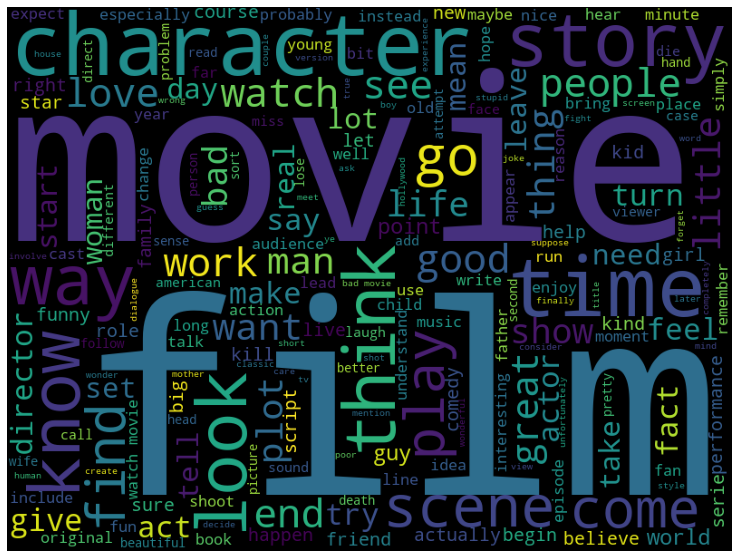

In [ ]:
cloud=WordCloud(width=800, height=600).generate(" ".join(df1['review'])) 
# join function can help merge all words into one string. " " means space can be a seperator between words.
plt.figure(figsize=(16,10))
plt.imshow(cloud)
plt.axis('off')

We can Observer from above word coud that Corpus Consits of following set of Terms

[ Film , movie, story, Character, watch , Scene ] 

In [ ]:
X_train_data = df1['review']

In [ ]:
df1['review_length'] = np.array(list(map(len, X_train_data)))
median = df1['review_length'].median()
mean = df1['review_length'].mean()
mode = df1['review_length'].mode()[0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


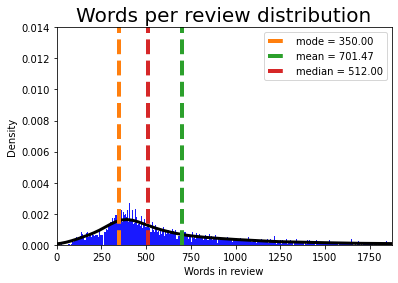

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df1['review_length'], bins=df1['review_length'].max(),
            hist_kws={"alpha": 0.9, "color": "blue"}, ax=ax,
            kde_kws={"color": "black", 'linewidth': 3})
ax.set_xlim(left=0, right=np.percentile(df1['review_length'], 95))
ax.set_xlabel('Words in review')
ymax = 0.014
plt.ylim(0, ymax)
ax.plot([mode, mode], [0, ymax], '--', label=f'mode = {mode:.2f}', linewidth=4)
ax.plot([mean, mean], [0, ymax], '--', label=f'mean = {mean:.2f}', linewidth=4)
ax.plot([median, median], [0, ymax], '--',
        label=f'median = {median:.2f}', linewidth=4)
ax.set_title('Words per review distribution', fontsize=20)
plt.legend()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)


In [ ]:
text_counts= cv.fit_transform(df1["review"])

In [ ]:
print(cv.vocabulary_)

{'reviewer': 73717, 'mention': 55279, 'watch': 96425, 'oz': 64467, 'episode': 27619, 'hook': 40887, 'right': 74069, 'exactly': 28434, 'happen': 38194, 'thing': 88728, 'strike': 84923, 'brutality': 11453, 'unflinching': 93096, 'scene': 76718, 'violence': 95390, 'set': 78748, 'word': 98701, 'trust': 91426, 'faint': 29423, 'hearted': 38966, 'timid': 89570, 'pull': 70360, 'punch': 70418, 'regard': 72576, 'drug': 25103, 'sex': 78885, 'hardcore': 38284, 'classic': 15848, 'use': 94185, 'nickname': 60352, 'oswald': 63662, 'maximum': 54285, 'security': 77771, 'state': 83922, 'penitentary': 65860, 'focus': 31954, 'mainly': 52782, 'emerald': 26838, 'city': 15686, 'experimental': 28853, 'section': 77759, 'prison': 69410, 'cell': 13899, 'glass': 35243, 'face': 29275, 'inwards': 44399, 'privacy': 69431, 'high': 39806, 'agenda': 1497, 'home': 40677, 'manyaryans': 53415, 'muslims': 58917, 'gangsta': 33933, 'latinos': 49219, 'christians': 15325, 'italians': 44770, 'irish': 44468, 'moreso': 57529, 'scuf

In [ ]:
type(cv.vocabulary_)

dict

In [ ]:
count = 0
for key in cv.vocabulary_:
  print(f"Word -> {key} || Frequency:{cv.vocabulary_[key]}")
  count += 1
  #print(key, cv.vocabulary_[key])


Streaming output truncated to the last 5000 lines.
Word -> humilation || Frequency:41709
Word -> teamvery || Frequency:87603
Word -> calledcan || Frequency:12518
Word -> brillent || Frequency:11057
Word -> conculsioni || Frequency:17479
Word -> belligerently || Frequency:7870
Word -> supervillainy || Frequency:86066
Word -> sheltons || Frequency:79429
Word -> reymar || Frequency:73803
Word -> reymars || Frequency:73804
Word -> dopeblood || Frequency:24360
Word -> hepititas || Frequency:39423
Word -> whiteknuckled || Frequency:97632
Word -> demonridden || Frequency:21811
Word -> quasidirty || Frequency:70806
Word -> brillaintly || Frequency:11055
Word -> uncollected || Frequency:92617
Word -> sleekly || Frequency:81175
Word -> hithcock || Frequency:40314
Word -> suspensemovie || Frequency:86339
Word -> eastwods || Frequency:25913
Word -> girlsmy || Frequency:35115
Word -> draaaaaag || Frequency:24697
Word -> mstiefication || Frequency:58368
Word -> naaahhh || Frequency:59127
Word -> hil

In [ ]:
print(" Total Vocabulary",count)

 Total Vocabulary 100582


### Total Vocabulary size and Word Frequency displayed above

# POS Processing

In [ ]:
df3 = pd.DataFrame()

In [ ]:
def pos_verb(text):
  my_doc = nlp(text)
  verb_list = []
  for token in my_doc:
    verb_list = [token.text for token in my_doc if token.pos_ == "VERB" and token.is_stop != True and token.is_punct != True]
  
  listToverb = ' '.join([str(elem) for elem in verb_list])
  return listToverb

In [ ]:
df3['verb']=df1['review'].apply(pos_verb)

In [ ]:
text = ' '.join(df3['verb'])

In [ ]:
text

"happen set pull dealing dare forget forget forget strike watch develop accustom kill turn watch choose write perform come use remain play set think spend sit disappoint realize think grow dare manage wear think decide kill decide argue ruin expect watch ignore offer tell meet connect know live live find discern encounter act rest come wish await work sacrifice bring happen bring grow comeback change thank believe want rhyme let submit leave quit let continue decline write find believe select choose recognize replace respect believe encourage look look  find lose imagine partake try come recall eat parachute include care love bump sat wear enjoy buy cry enjoy kill infiltrate locate warn cry feel set invite self eating find complain stay know look play mutate perform remind start want stay deliver mean imply enter cry poop want want cast lose appreciate try bring ruin know know try improve write cut roll recommand draw realize think suppose learn play pass waste spend starve remade fail

In [ ]:
len(text)

2175431

##  Top 10 Most Common VERBS 

In [ ]:
from collections import Counter

In [ ]:
verb_list = []

In [ ]:
for word in text.split():
  verb_list.append(word)


In [ ]:
verb_freq = Counter(verb_list)

In [ ]:
verb_freq.most_common(10)

[('think', 10453),
 ('know', 8874),
 ('look', 8040),
 ('come', 7635),
 ('find', 7488),
 ('watch', 7225),
 ('want', 6439),
 ('try', 5974),
 ('play', 5961),
 ('feel', 5387)]

### TOP 10 Most Common Nouns

In [ ]:
def pos_noun(text):
  my_doc = nlp(text)
  noun_list = []
  adv_list = []
  for token in my_doc:
    noun_list = [token.text for token in my_doc if token.pos_ == "NOUN" and token.is_stop != True and token.is_punct != True]
  listTonoun = ' '.join([str(elem) for elem in noun_list])
  return listTonoun

In [ ]:
df3['noun']=df1['review'].apply(pos_noun)

In [ ]:
noun_text = ' '.join(df3['noun'])

In [ ]:
noun_list = []
for noun in noun_text:
  noun_list.append(noun)


In [ ]:
noun_freq = Counter(noun_list)
noun_freq.most_common(10)

### TOP 10 Most Common Adverbs

In [ ]:
def pos_adv(text):
  my_doc = nlp(text)
  adv_list = []
  for token in my_doc:
    adv_list = [token.text for token in my_doc if token.pos_ == "ADV" and token.is_stop != True and token.is_punct != True]
  return adv_list

In [ ]:
df3['adverb']=df1['review'].apply(pos_adv)

### NOUN PHRASE

In [ ]:
def noun_chunks(text):
  my_doc = nlp(text)
  nounchunk_list = []
  for chunk in my_doc.noun_chunks:
    nounchunk_list.append(chunk)
  #listTonoun = ' '.join([str(elem) for elem in noun_list])
  return nounchunk_list

In [ ]:
df3['noun_phrase']=df1['review'].apply(noun_chunks)

In [ ]:
df3

verb  ...                                        noun_phrase
0      happen set pull dealing dare forget forget for...  ...  [(reviewer), (watch), (1, oz, episode, hook), ...
1          choose write perform come use remain play set  ...  [(wonderful, little, production), (film, techn...
2      think spend sit disappoint realize think grow ...  ...  [(wonderful, way), (time), (air, condition, th...
3      think decide kill decide argue ruin expect wat...  ...  [(family, little, boy), (jake), (zombie, close...
4      offer tell meet connect know live live find di...  ...  [(petter, mattei), (time, money), (visually, s...
...                                                  ...  ...                                                ...
24995  treat need stoop deliver substantiate think wa...  ...  [(movie, real, torture, fest, sit), (mistake),...
24996  compete play write treat sit disguise deserve ...  ...  [(john, wayne), (albert, dekker), (oil), (righ...
24997  bring cast break convey know beat rivet know h...  ...  [(tarantino), (melodrama), (call, backstreet, ...
24998                          check find look gain come  ...  [(aah, yes, workout), (woman, shape), (teenage...
24999  admit play convince start read watch disturb s...  ...  [(film), (doubt), (young, woman), (main, tv, p...

[25000 rows x 3 columns]

In [ ]:
noun_phrase_list = []
for row in df3['noun_phrase']:
  for nounphrase in row:
    noun_phrase_list.append(nounphrase)


In [ ]:
df3['noun_phrase'][0]

[reviewer,
 watch,
 1 oz episode hook,
 thing,
 oz brutality unflinching scene violence,
 right word,
 trust,
 punch regard drug,
 sex violence,
 hardcore , classic use word,
 call oz nickname,
 oswald,
 maximum security state penitentary,
 focus,
 emerald city , experimental section prison cell glass front face,
 city home,
 aryans,
 muslims,
 gangsta,
 christians,
 italians,
 irish .... scuffle,
 death stare,
 shady agreement,
 main appeal fact,
 pretty picture paint mainstream audience,
 charm,
 romance,
 oz mess,
 episode,
 taste oz,
 high level graphic violence,
 violence , injustice,
 crooked guard,
 nickel,
 inmate,
 order,
 middle class inmate,
 prison bitch lack street skill prison experience]

In [ ]:
noun_phrase_frequnency =  Counter(noun_phrase_list)
noun_phrase_frequnency.most_common(10)

[(reviewer, 1),
 (watch, 1),
 (1 oz episode hook, 1),
 (thing, 1),
 (oz brutality unflinching scene violence, 1),
 (right word, 1),
 (trust, 1),
 (punch regard drug, 1),
 (sex violence, 1),
 (hardcore , classic use word, 1)]

### VERB PHRASE

In [ ]:
text = ' '.join(df3['review'])

In [ ]:
len(text)

701172

In [ ]:
def get_pps(doc):
    "Function to get VPs from a parsed document."
    vps = []
    for token in doc:
        # Try this with other parts of speech for different subtrees.
        if token.pos_ == 'VERB':
            vp = ' '.join([tok.orth_ for tok in token.subtree])
            vps.append(vp)
    return pps

In [ ]:
doc = nlp(text)

In [ ]:
print(get_pps(doc))

['right exactly happen thing strike oz brutality unflinching scene violence set', 'set', 'pull punch regard drug sex violence hardcore classic use word call oz nickname give oswald maximum security state penitentary focus', 'dodgy dealing shady agreement far away', 'main appeal fact go', 'show dare forget', 'pretty picture paint mainstream audience forget charm forget romanceoz mess episode see strike nasty surreal ready watch developed taste', 'romanceoz mess episode see strike nasty surreal ready watch developed taste', 'strike', 'strike nasty surreal ready watch developed taste', 'kill order away mannere', 'middle class inmate turn prison bitch lack street skill prison experience watch', 'prison bitch lack street skill prison experience watch', 'viewingthat touch', 'oz comfortable uncomfortable viewingthat touch darker wonderful little production filming technique unassume oldtimebbc fashion give comfort discomforte sense realism', 'entire piece actor extremely choose michael sheen 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:

from nltk import pos_tag, word_tokenize, RegexpParser

In [ ]:
# # Example text
# sample_text = df3['review'][0]
  
# # Find all parts of speech in above sentence
# tagged = pos_tag(word_tokenize(sample_text))
  
# #Extract all parts of speech from any text
# chunker = RegexpParser("""
#                        NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
#                        P: {<IN>}               #To extract Prepositions
#                        V: {<V.*>}              #To extract Verbs
#                        PP: {<p> <NP>}          #To extract Prepositional Phrases
#                        VP: {<V> <NP|PP>*}      #To extract Verb Phrases
#                        """)
 
# # Print all parts of speech in above sentence
# output = chunker.parse(tagged)
# print("After Extracting\n", output)

In [ ]:
#chunk_grammar = "VP: {<VB.*><DT>?<JJ>*<NN><RB.?>?}"

In [ ]:
def verb_phrase(text):
# Example text
  sample_text = text 
  # Find all parts of speech in above sentence
  tagged = pos_tag(word_tokenize(sample_text))  
  #Extract all parts of speech from any text
  chunker = RegexpParser("""
                        VP: {<V> <NP|PP>*}      #To extract Verb Phrases
                        """) 
  # Print all parts of speech in above sentence
  output = chunker.parse(tagged)
  #print("After Extracting\n", output)
  return output

In [ ]:
df3['verbPhrase'] = df3['review'].apply(verb_phrase)

Plot a graph of the frequency of word vs rank of the word. How would you characterize the relationship? For your reference - consult “Zipf’s law” – and determine the best fit for your corpus?

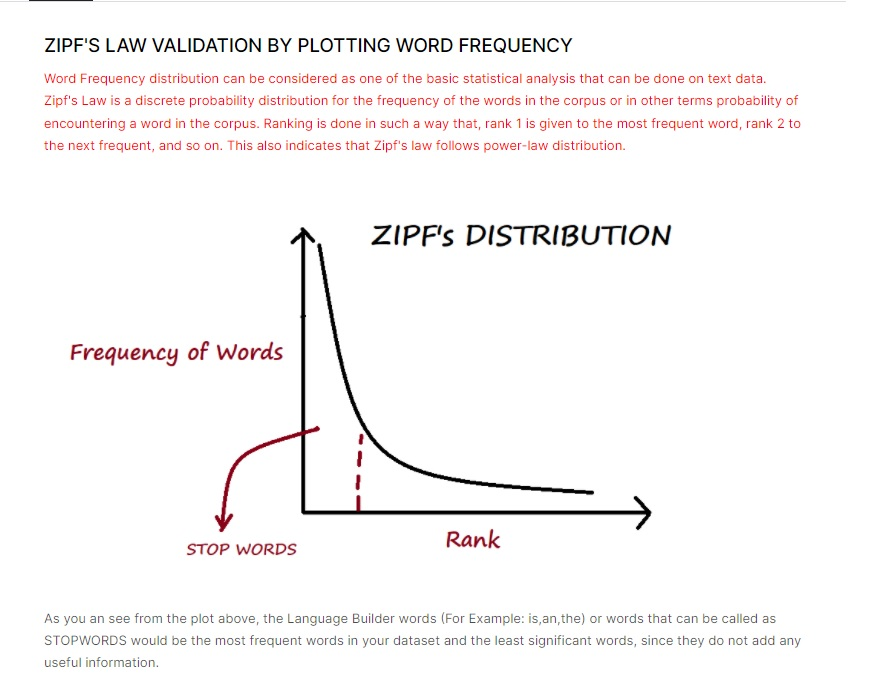

In [ ]:
# https://www.kaggle.com/vishynair/zipf-s-law-validation-with-word-frequency

In [ ]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

In [ ]:
corpus = build_corpus(df1['review'])

In [ ]:
corpus = corpus.split()

In [ ]:
from nltk import FreqDist

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Importing the String module
import string
from nltk import FreqDist
from nltk.corpus import stopwords

In [ ]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


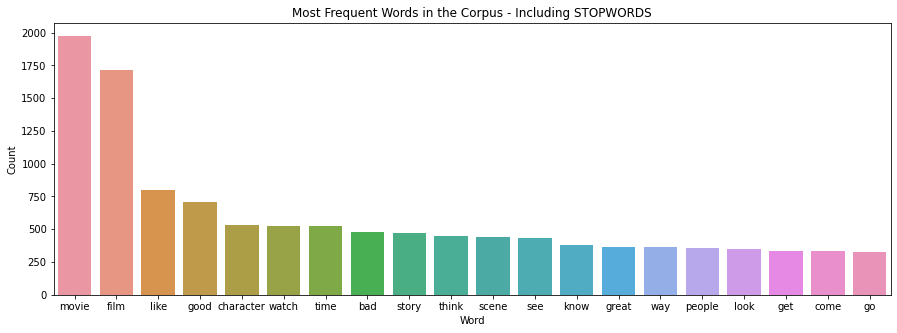

In [ ]:
plot_word_frequency(corpus,20)

You can find that, most of the words present over here in the top occuring list are STOPWORDS and the most frequenct word here is the and that is obvious.
This is in line with what we were expecting - The most frequent words in the corpus are Language Builders. We can remove the stopwords and try plotting again to find out the most occuring words in the corpus

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus_without_stop = [word for word in corpus if word not in stopwords.words("english")]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


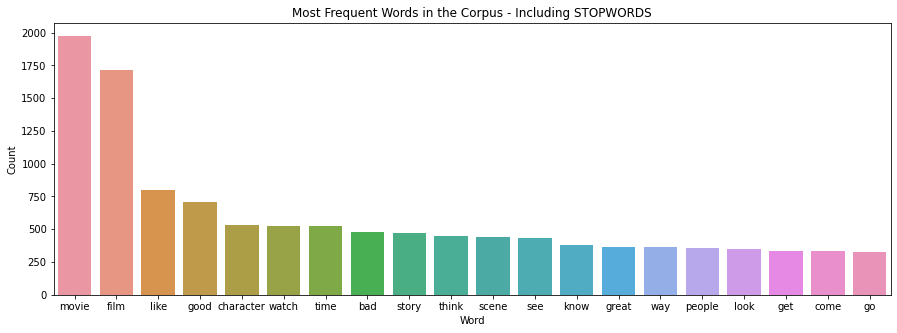

In [ ]:
plot_word_frequency(corpus_without_stop,20)

## LOG-LOG PLOT for Frequency vs Rank

In [ ]:
#Creating a FreqDist object
fd=FreqDist()

In [ ]:
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

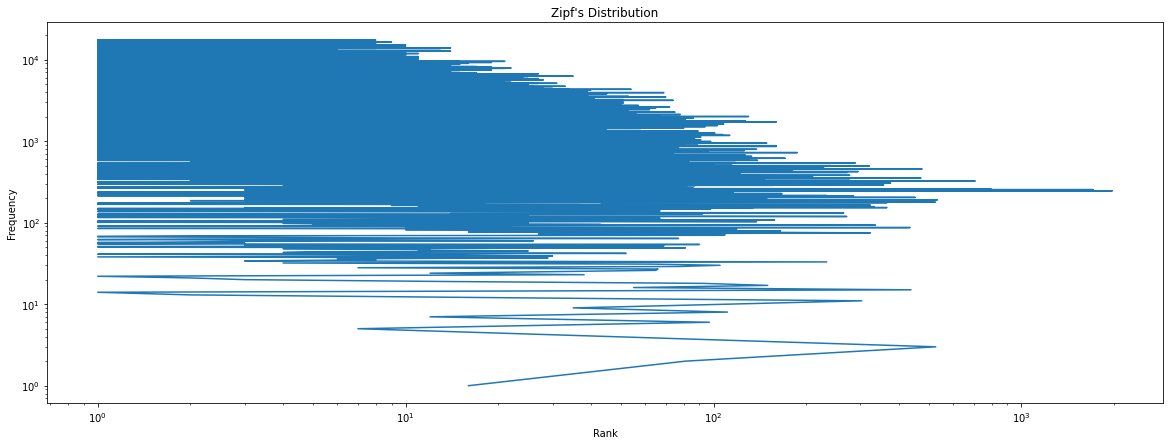

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

Extract the topics from the corpus using LDA and present a visualization of them in your report. [You can use any ML library e.g Mallet]

In [ ]:
#https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda

In [ ]:
#https://www.kaggle.com/likhithap/imdb-movie-lsa-and-lda

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words=set(nltk.corpus.stopwords.words('english'))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [ ]:
vect_text=vect.fit_transform(df1['review'])

In [ ]:
print(vect.get_feature_names())

['10', '100', '12', '15', '20', '30', '50', '70', '80', '90', 'ability', 'able', 'absolutely', 'accent', 'accept', 'act', 'acting', 'action', 'actor', 'actress', 'actual', 'actually', 'adaptation', 'add', 'admit', 'adult', 'adventure', 'age', 'agent', 'ago', 'agree', 'air', 'alien', 'alive', 'allow', 'amazing', 'america', 'american', 'animal', 'animation', 'annoying', 'answer', 'apart', 'apparently', 'appeal', 'appear', 'appearance', 'appreciate', 'approach', 'area', 'army', 'arrive', 'art', 'artist', 'aside', 'ask', 'aspect', 'assume', 'atmosphere', 'attack', 'attempt', 'attention', 'audience', 'available', 'average', 'avoid', 'award', 'away', 'awesome', 'awful', 'baby', 'background', 'bad', 'badly', 'band', 'bar', 'barely', 'base', 'basic', 'basically', 'battle', 'bear', 'beat', 'beautiful', 'beautifully', 'beauty', 'bed', 'begin', 'believable', 'believe', 'ben', 'best', 'better', 'big', 'bill', 'bit', 'bite', 'bizarre', 'black', 'blood', 'blow', 'blue', 'body', 'bond', 'book', 'bore

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [ ]:
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)

(25000, 10)


In [ ]:
print(lda_top[0])

[0.01346374 0.01346374 0.01346374 0.01346796 0.01346391 0.87881686
 0.01346374 0.01346795 0.01346374 0.01346463]


In [ ]:
vocab = vect.get_feature_names_out()

##For each topic: Present 20 most significant sentences.

In [ ]:
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:20]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
christmas fire kill film appearance dvd etc nearly movie hard sequel character watch idea laugh turn club like reach subject 

Topic 1: 
cartoon gag japanese rock air kick fiction mood perfectly mad movie bad hour see scientist immediately pick awful age bore 

Topic 2: 
war culture relationship movie german battle army western soldier beautiful hilarious fight describe film world wonderful great time remain visit 

Topic 3: 
movie love watch see remember tv episode dvd year child copy series kid family great time know parent like good 

Topic 4: 
game bond james space player control play level ship planet crew alien great special movie like camp earth musical age 

Topic 5: 
film movie good story character like great time love play life scene see man watch way think end find work 

Topic 6: 
season match team series mary history race chemistry buy soundtrack entertaining past easy song week roll fan love remember david 

Topic 7: 
movie film bad like watch good see time thin

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

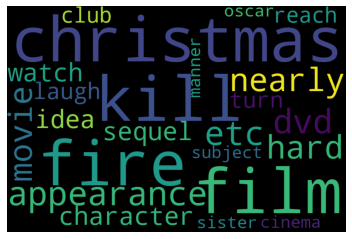

In [ ]:
draw_word_cloud(0)

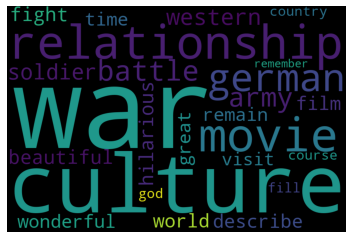

In [ ]:
draw_word_cloud(2)

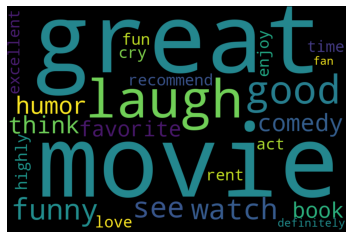

In [ ]:
draw_word_cloud(9)

In [ ]:
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [ ]:
# top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

# for i in range(len(top_n_words_lda)):
#     print("Topic {}: ".format(i+1), top_n_words_lda[i])

In [ ]:
# top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
# labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

# fig, ax = plt.subplots(figsize=(16,8))
# ax.bar(lda_categories, lda_counts);
# ax.set_xticks(lda_categories);
# ax.set_xticklabels(labels);
# ax.set_title('LDA topic counts');
# ax.set_ylabel('Number of headlines');

In [ ]:
# vocab = vect.get_feature_names()

# for i, comp in enumerate(lda_model.components_):
#     vocab_comp = zip(vocab, comp)
#     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
#     print("Topic "+str(i)+": ")
#     for t in sorted_words:
#         print(t[0],end=" ")
#     print("\n")